Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 3 
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/_neu_GIT_03012024/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:2]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            pass
    
HelperClass.HelperClass.printInColor(resultList[0].solution, 'blue')

        

Erstes Ziel Interim:[[3, 10], 7.810249675906654, 'interim0']
try-Pfad nach Löschung von Start:  [23, 0, 'interim0']
While beginnt


Aktueller Node (step):  23
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [9, 15]
step [8.068317516448225, 10.685045677394537]
******* Check Edges for Collision
Step 23
Path start


Ziel-Interim: [[3, 10], 5.114404171323659, 'interim0']


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [3.400632973989036, 9.85131748016051]
******* Check Edges for Collision
Step 0
Path 23
Collison zwischen 0   23

Kollision erkannt
Trypath vor pop  [23, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [3.174323195690971, 10.489572992269128]
******* Check Edges for Collision
Step 17
Path 23
Collison zwischen 17   23

Kollision erkannt
Trypath vor pop  [23, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [32, 'interim0']

While beginnt


Aktueller Node (step):  32
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [4.518039203383497, 10.489438267724122]
******* Check Edges for Collision
Step 32
Path 23
Collison zwischen 32   23

Kollision erkannt
Trypath vor pop  [23, 41, 'interim0']
TRYPATH-Umplanung nach Kollision: [41, 'interim0']

While beginnt


Aktueller Node (step):  41
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [3.4550223280590013, 11.401828635992414]
******* Check Edges for Collision
Step 41
Path 23
Collison zwischen 41   23

Kollision erkannt
Trypath vor pop  [23, 67, 'interim0']
TRYPATH-Umplanung nach Kollision: [67, 'interim0']

While beginnt


Aktueller Node (step):  67
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [6.3914862626277635, 11.656558702315605]
Removed nodeNumber mit Koordinaten: [6.3914862626277635, 11.656558702315605]
Remove Nodenumer:  67

Kollision erkannt
Trypath vor pop  [23, 31, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [31, 32, 'interim0']

While beginnt


Aktueller Node (step):  31
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [9.031908462464092, 8.547032508476976]
Removed nodeNumber mit Koordinaten: [9.031908462464092, 8.547032508476976]
Remove Nodenumer:  31

Kollision erkannt
Trypath vor pop  [23, 24, 0, 'interim0']
TRYPATH-Umplanung nach Kollision: [24, 0, 'interim0']

While beginnt


Aktueller Node (step):  24
Neues Interim !!!=== altes Interim:
23  entfernt
trypath ungleiches Interim:  [24, 6, 'interim2']

While beginnt


Aktueller Node (step):  24
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [6.920039952002146, 6.206991881379173]
******* Check Edges for Collision
Step 24
Path 23
Collison zwischen 24   23

Kollision erkannt
Trypath vor pop  [23, 18, 27, 6, 'interim2']
TRYPATH-Umplanung nach Kollision: [18, 27, 6, 'interim2']

While beginnt


Aktueller Node (step):  18
Neues Interim !!!=== altes Interim:
23  entfernt
trypath ungleiches Interim:  [74, 32, 'interim0']

While beginnt


Aktueller Node (step):  74
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [8.362229504384482, 8.836107049020786]
Removed nodeNumber mit Koordinaten: [8.362229504384482, 8.836107049020786]
Remove Nodenumer:  74

Kollision erkannt
Trypath vor pop  [23, 86, 'interim0']
TRYPATH-Umplanung nach Kollision: [86, 'interim0']

While beginnt


Aktueller Node (step):  86
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [5.587577424198682, 10.012035500772768]
Removed nodeNumber mit Koordinaten: [5.587577424198682, 10.012035500772768]
Remove Nodenumer:  86

Kollision erkannt
Trypath vor pop  [23, 83, 78, 'interim0']
TRYPATH-Umplanung nach Kollision: [83, 78, 'interim0']

While beginnt


Aktueller Node (step):  83
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [6.970346741407228, 14.108491338251483]
Removed nodeNumber mit Koordinaten: [6.970346741407228, 14.108491338251483]
Remove Nodenumer:  83

Kollision erkannt
Trypath vor pop  [23, 98, 78, 'interim0']
TRYPATH-Umplanung nach Kollision: [98, 78, 'interim0']

While beginnt


Aktueller Node (step):  98
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [5.6718674987618005, 13.401360921430785]
Removed nodeNumber mit Koordinaten: [5.6718674987618005, 13.401360921430785]
Remove Nodenumer:  98

Kollision erkannt
Trypath vor pop  [23, 100, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [100, 32, 'interim0']

While beginnt


Aktueller Node (step):  100
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [7.56337384754573, 13.073673306419764]
******* Check Edges for Collision
Step 100
Path 23


Ziel-Interim: [[3, 10], 5.501985865763536, 'interim0']


Aktueller Node (step):  32
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [4.518039203383497, 10.489438267724122]
******* Check Edges for Collision
Step 32
Path 100
Collison zwischen 32   100

Kollision erkannt
Trypath vor pop  [100, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [17, 'interim0']

While beginnt


Aktueller Node (step):  17
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [3.174323195690971, 10.489572992269128]
******* Check Edges for Collision
Step 17
Path 100
Collison zwischen 17   100

Kollision erkannt
Trypath vor pop  [100, 41, 'interim0']
TRYPATH-Umplanung nach Kollision: [41, 'interim0']

While beginnt


Aktueller Node (step):  41
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [3.4550223280590013, 11.401828635992414]
******* Check Edges for Collision
Step 41
Path 100
Collison zwischen 41   100

Kollision erkannt
Trypath vor pop  [100, 78, 'interim0']
TRYPATH-Umplanung nach Kollision: [78, 'interim0']

While beginnt


Aktueller Node (step):  78
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [3.329245576030716, 12.752969825653489]
******* Check Edges for Collision
Step 78
Path 100
Collison zwischen 78   100

Kollision erkannt
Trypath vor pop  [100, 106, 'interim0']
TRYPATH-Umplanung nach Kollision: [106, 'interim0']

While beginnt


Aktueller Node (step):  106
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [6.4997369183728555, 10.139200470701178]
Removed nodeNumber mit Koordinaten: [6.4997369183728555, 10.139200470701178]
Remove Nodenumer:  106

Kollision erkannt
Trypath vor pop  [100, 120, 78, 'interim0']
TRYPATH-Umplanung nach Kollision: [120, 78, 'interim0']

While beginnt


Aktueller Node (step):  120
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [4.8318900734552965, 13.365606008910166]
******* Check Edges for Collision
Step 120
Path 100
Collison zwischen 120   100

Kollision erkannt
Trypath vor pop  [100, 'start', 49, 19, 'interim0']
TRYPATH-Umplanung nach Kollision: ['start', 49, 19, 'interim0']

While beginnt


Aktueller Node (step):  start
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [9, 15]
******* Check Edges for Collision
Step start
Path 100


Ziel-Interim: [[3, 10], 7.810249675906654, 'interim0']


Aktueller Node (step):  49
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [9, 15]
step [3.4838333557157375, 16.374882887917554]
******* Check Edges for Collision
Step 49
Path start
Collison zwischen 49   start

Kollision erkannt
Trypath vor pop  ['start', 136, 78, 'interim0']
TRYPATH-Umplanung nach Kollision: [136, 78, 'interim0']

While beginnt


Aktueller Node (step):  136
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [9, 15]
step [6.5781248475414635, 13.638428267845217]
Removed nodeNumber mit Koordinaten: [6.5781248475414635, 13.638428267845217]
Remove Nodenumer:  136

Kollision erkannt
Trypath vor pop  ['start', 119, 49, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [119, 49, 17, 'interim0']

While beginnt


Aktueller Node (step):  119
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [9, 15]
step [7.828999243192721, 14.95506720899773]
******* Check Edges for Collision
Step 119
Path start


Ziel-Interim: [[3, 10], 6.918954020402248, 'interim0']


Aktueller Node (step):  49
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.828999243192721, 14.95506720899773]
step [3.4838333557157375, 16.374882887917554]
******* Check Edges for Collision
Step 49
Path 119
Collison zwischen 49   119

Kollision erkannt
Trypath vor pop  [119, 142, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [142, 32, 'interim0']

While beginnt


Aktueller Node (step):  142
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.828999243192721, 14.95506720899773]
step [6.7740112375450625, 12.002149824547786]
Removed nodeNumber mit Koordinaten: [6.7740112375450625, 12.002149824547786]
Remove Nodenumer:  142

Kollision erkannt
Trypath vor pop  [119, 148, 120, 17, 'interim0']
TRYPATH-Umplanung nach Kollision: [148, 120, 17, 'interim0']

While beginnt


Aktueller Node (step):  148
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.828999243192721, 14.95506720899773]
step [8.228808885624677, 12.539321948572365]
******* Check Edges for Collision
Step 148
Path 119


Ziel-Interim: [[3, 10], 5.812796084578309, 'interim0']


Aktueller Node (step):  120
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.228808885624677, 12.539321948572365]
step [4.8318900734552965, 13.365606008910166]
******* Check Edges for Collision
Step 120
Path 148
Collison zwischen 120   148

Kollision erkannt
Trypath vor pop  [148, 100, 18, 27, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [100, 18, 27, 6, 'interim0']

While beginnt


Aktueller Node (step):  100
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.228808885624677, 12.539321948572365]
step [7.56337384754573, 13.073673306419764]
******* Check Edges for Collision
Step 100
Path 148


Ziel-Interim: [[3, 10], 5.501985865763536, 'interim0']


Aktueller Node (step):  18
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [7.56337384754573, 13.073673306419764]
step [11.56574363382252, 10.28609250868518]
******* Check Edges for Collision
Step 18
Path 100


Ziel-Interim: [[3, 10], 8.570519991453073, 'interim0']


Aktueller Node (step):  27
Neues Interim !!!=== altes Interim:
18  entfernt
trypath ungleiches Interim:  [27, 33, 'interim4']

While beginnt


Aktueller Node (step):  27
Neues Interim == altes Interim:  interim4
Path im Check and CollisonUpdate [11.56574363382252, 10.28609250868518]
step [9.433603477233143, 6.007262344776914]
******* Check Edges for Collision
Step 27
Path 18
Collison zwischen 27   18

Kollision erkannt
Trypath vor pop  [18, 14, 33, 'interim4']
TRYPATH-Umplanung nach Kollision: [14, 33, 'interim4']

While beginnt


Aktueller Node (step):  14
Neues Interim == altes Interim:  interim4
Path im Check and CollisonUpdate [11.56574363382252, 10.28609250868518]
step [12.365372327411368, 8.006092806943782]
Removed nodeNumber mit Koordinaten: [12.365372327411368, 8.006092806943782]
Remove Nodenumer:  14

Kollision erkannt
Trypath vor pop  [18, 128, 27, 33, 'interim4']
TRYPATH-Umplanung nach Kollision: [128, 27, 33, 'interim4']

While beginnt


Aktueller Node (step):  128
Neues Interim !!!=== altes Interim:
18  entfernt
trypath ungleiches Interim:  [128, 27, 6, 'interim0']

While beginnt


Aktueller Node (step):  128
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [11.56574363382252, 10.28609250868518]
step [10.348665718711755, 8.965817701857304]
Removed nodeNumber mit Koordinaten: [10.348665718711755, 8.965817701857304]
Remove Nodenumer:  128

Kollision erkannt
Trypath vor pop  [18, 23, 167, 27, 6, 'interim0']
TRYPATH-Umplanung nach Kollision: [23, 167, 27, 6, 'interim0']

While beginnt


Aktueller Node (step):  23
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [11.56574363382252, 10.28609250868518]
step [8.068317516448225, 10.685045677394537]
******* Check Edges for Collision
Step 23
Path 18


Ziel-Interim: [[3, 10], 5.114404171323659, 'interim0']


Aktueller Node (step):  167
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [8.833029158500215, 7.405703770301115]
Removed nodeNumber mit Koordinaten: [8.833029158500215, 7.405703770301115]
Remove Nodenumer:  167

Kollision erkannt
Trypath vor pop  [23, 179, 24, 0, 'interim0']
TRYPATH-Umplanung nach Kollision: [179, 24, 0, 'interim0']

While beginnt


Aktueller Node (step):  179
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [8.756393339685694, 8.898681805380827]
Removed nodeNumber mit Koordinaten: [8.756393339685694, 8.898681805380827]
Remove Nodenumer:  179

Kollision erkannt
Trypath vor pop  [23, 181, 'interim0']
TRYPATH-Umplanung nach Kollision: [181, 'interim0']

While beginnt


Aktueller Node (step):  181
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [6.009048317336218, 8.951255574676]
Removed nodeNumber mit Koordinaten: [6.009048317336218, 8.951255574676]
Remove Nodenumer:  181

Kollision erkannt
Trypath vor pop  [23, 'start', 22, 5, 19, 'interim0']
TRYPATH-Umplanung nach Kollision: ['start', 22, 5, 19, 'interim0']

While beginnt


Aktueller Node (step):  start
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.068317516448225, 10.685045677394537]
step [9, 15]
******* Check Edges for Collision
Step start
Path 23


Ziel-Interim: [[3, 10], 7.810249675906654, 'interim0']


Aktueller Node (step):  22
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [9, 15]
step [8.026040884635421, 20.50372551136481]
******* Check Edges for Collision
Step 22
Path start


Ziel-Interim: [[3, 10], 11.644283429740224, 'interim0']


Aktueller Node (step):  5
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [8.026040884635421, 20.50372551136481]
step [1.859371308555312, 18.60264488472351]
******* Check Edges for Collision
Step 5
Path 22


Ziel-Interim: [[3, 10], 8.677933672505592, 'interim0']


Aktueller Node (step):  19
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [1.859371308555312, 18.60264488472351]
step [2.447398655170801, 15.443213273057868]
******* Check Edges for Collision
Step 19
Path 5


Ziel-Interim: [[3, 10], 5.471191733278992, 'interim0']


Aktueller Node (step):  interim0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [2.447398655170801, 15.443213273057868]
step [3, 10]
******* Check Edges for Collision
Step interim0
Path 19


Ziel-Interim: [[3, 10], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[3, 3], 7.0, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 6, 'interim2']
interim0  entfernt
While beginnt


Aktueller Node (step):  6
Neues Interim !!!=== altes Interim:
interim0  entfernt
trypath ungleiches Interim:  [6, 'interim2']

While beginnt


Aktueller Node (step):  6
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [3, 10]
step [4.288382064622941, 5.272133937305773]
******* Check Edges for Collision
Step 6
Path interim0


Ziel-Interim: [[3, 3], 2.6119955921667835, 'interim2']


Aktueller Node (step):  interim2
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4.288382064622941, 5.272133937305773]
step [3, 3]
******* Check Edges for Collision
Step interim2
Path 6


Ziel-Interim: [[3, 3], 0.0, 'interim2']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[10, 1], 7.280109889280518, 'interim4']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 46, 'interim4']
interim2  entfernt
While beginnt


Aktueller Node (step):  46
Neues Interim !!!=== altes Interim:
interim2  entfernt
trypath ungleiches Interim:  [46, 'interim4']

While beginnt


Aktueller Node (step):  46
Neues Interim == altes Interim:  interim4
Path im Check and CollisonUpdate [3, 3]
step [6.963113661630836, 2.210279458228369]
******* Check Edges for Collision
Step 46
Path interim2


Ziel-Interim: [[10, 1], 3.269167325051262, 'interim4']


Aktueller Node (step):  interim4
Neues Interim == altes Interim:  interim4
Path im Check and CollisonUpdate [6.963113661630836, 2.210279458228369]
step [10, 1]
******* Check Edges for Collision
Step interim4
Path 46


Ziel-Interim: [[10, 1], 0.0, 'interim4']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[22, 8], 13.892443989449804, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim4', 53, 26, 10, 'interim1']
interim4  entfernt
While beginnt


Aktueller Node (step):  53
Neues Interim !!!=== altes Interim:
interim4  entfernt
trypath ungleiches Interim:  [53, 26, 10, 'interim1']

While beginnt


Aktueller Node (step):  53
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [10, 1]
step [12.1774580615577, 0.5788496867937061]
******* Check Edges for Collision
Step 53
Path interim4


Ziel-Interim: [[22, 8], 12.310800221905142, 'interim1']


Aktueller Node (step):  26
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [12.1774580615577, 0.5788496867937061]
step [18.07245142791253, 0.11152275417782942]
******* Check Edges for Collision
Step 26
Path 53


Ziel-Interim: [[22, 8], 8.812134306963351, 'interim1']


Aktueller Node (step):  10
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [18.07245142791253, 0.11152275417782942]
step [20.23573001114959, 7.870128382908158]
******* Check Edges for Collision
Step 10
Path 26


Ziel-Interim: [[22, 8], 1.7690435920248744, 'interim1']


Aktueller Node (step):  interim1
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [20.23573001114959, 7.870128382908158]
step [22, 8]
******* Check Edges for Collision
Step interim1
Path 10


Ziel-Interim: [[22, 8], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[20, 15], 7.280109889280518, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 4, 8, 'interim3']
interim1  entfernt
While beginnt


Aktueller Node (step):  4
Neues Interim !!!=== altes Interim:
interim1  entfernt
trypath ungleiches Interim:  [4, 8, 'interim3']

While beginnt


Aktueller Node (step):  4
Neues Interim == altes Interim:  interim3
Path im Check and CollisonUpdate [22, 8]
step [18.905479660159422, 9.128687480766196]
******* Check Edges for Collision
Step 4
Path interim1


Ziel-Interim: [[20, 15], 5.972460587801006, 'interim3']


Aktueller Node (step):  8
Neues Interim == altes Interim:  interim3
Path im Check and CollisonUpdate [18.905479660159422, 9.128687480766196]
step [19.247300123541045, 13.58964285640532]
******* Check Edges for Collision
Step 8
Path 4


Ziel-Interim: [[20, 15], 1.5986445435148715, 'interim3']


Aktueller Node (step):  interim3
Neues Interim == altes Interim:  interim3
Path im Check and CollisonUpdate [19.247300123541045, 13.58964285640532]
step [20, 15]
******* Check Edges for Collision
Step interim3
Path 8


Ziel-Interim: [[20, 15], 0.0, 'interim3']
Interim ist erreicht!


Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [14, 8, 'interim2']
While beginnt


Aktueller Node (step):  14
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [3.774806081049605, 10.32040452076397]
******* Check Edges for Collision
Step 14
Path start
Collison zwischen 14   start

Kollision erkannt
Trypath vor pop  ['start', 29, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [29, 8, 'interim2']

While beginnt


Aktueller Node (step):  29
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [4.963937533493059, 11.415633564134923]
******* Check Edges for Collision
Step 29
Path start
Collison zwischen 29   start

Kollision erkannt
Trypath vor pop  ['start', 34, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [34, 8, 'interim2']

While beginnt


Aktueller Node (step):  34
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [1.64455694461364, 14.485895687589029]
******* Check Edges for Collision
Step 34
Path start


Ziel-Interim: [[4, 4], 10.747191277639288, 'interim2']


Aktueller Node (step):  8
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [1.279404559599479, 8.640897997858929]
******* Check Edges for Collision
Step 8
Path 34
Collison zwischen 8   34

Kollision erkannt
Trypath vor pop  [34, 14, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [14, 8, 'interim2']

While beginnt


Aktueller Node (step):  14
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [3.774806081049605, 10.32040452076397]
******* Check Edges for Collision
Step 14
Path 34
Collison zwischen 14   34

Kollision erkannt
Trypath vor pop  [34, 29, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [29, 8, 'interim2']

While beginnt


Aktueller Node (step):  29
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [4.963937533493059, 11.415633564134923]
******* Check Edges for Collision
Step 29
Path 34
Collison zwischen 29   34

Kollision erkannt
Trypath vor pop  [34, 50, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [50, 8, 'interim2']

While beginnt


Aktueller Node (step):  50
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [2.2479864642238305, 10.324094334515078]
******* Check Edges for Collision
Step 50
Path 34
Collison zwischen 50   34

Kollision erkannt
Trypath vor pop  [34, 20, 29, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [20, 29, 8, 'interim2']

While beginnt


Aktueller Node (step):  20
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [3.469691822890812, 15.066614325241598]
******* Check Edges for Collision
Step 20
Path 34


Ziel-Interim: [[4, 4], 11.079313127913275, 'interim2']


Aktueller Node (step):  29
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [3.469691822890812, 15.066614325241598]
step [4.963937533493059, 11.415633564134923]
******* Check Edges for Collision
Step 29
Path 20
Collison zwischen 29   20

Kollision erkannt
Trypath vor pop  [20, 39, 16, 'interim2']
TRYPATH-Umplanung nach Kollision: [39, 16, 'interim2']

While beginnt


Aktueller Node (step):  39
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [3.469691822890812, 15.066614325241598]
step [7.378860940651692, 12.844953217757608]
Removed nodeNumber mit Koordinaten: [7.378860940651692, 12.844953217757608]
Remove Nodenumer:  39

Kollision erkannt
Trypath vor pop  [20, 80, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [80, 8, 'interim2']

While beginnt


Aktueller Node (step):  80
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [3.469691822890812, 15.066614325241598]
step [1.3409949433356554, 11.704915108337383]
******* Check Edges for Collision
Step 80
Path 20
Collison zwischen 80   20

Kollision erkannt
Trypath vor pop  [20, 'start', 36, 16, 'interim2']
TRYPATH-Umplanung nach Kollision: ['start', 36, 16, 'interim2']

While beginnt


Aktueller Node (step):  start
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [3.469691822890812, 15.066614325241598]
step [4, 15]
******* Check Edges for Collision
Step start
Path 20


Ziel-Interim: [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  36
Neues Interim !!!=== altes Interim:
start  entfernt
trypath ungleiches Interim:  [36, 66, 0, 'interim1']

While beginnt


Aktueller Node (step):  36
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [4, 15]
step [9.38587100290675, 12.474435727428874]
******* Check Edges for Collision
Step 36
Path start
Collison zwischen 36   start

Kollision erkannt
Trypath vor pop  ['start', 42, 66, 0, 'interim1']
TRYPATH-Umplanung nach Kollision: [42, 66, 0, 'interim1']

While beginnt


Aktueller Node (step):  42
Neues Interim !!!=== altes Interim:
start  entfernt
trypath ungleiches Interim:  [42, 16, 'interim2']

While beginnt


Aktueller Node (step):  42
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [8.548170649184238, 10.315152110840641]
******* Check Edges for Collision
Step 42
Path start
Collison zwischen 42   start

Kollision erkannt
Trypath vor pop  ['start', 63, 16, 'interim2']
TRYPATH-Umplanung nach Kollision: [63, 16, 'interim2']

While beginnt


Aktueller Node (step):  63
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [5.7689006278096855, 12.15338060514436]
******* Check Edges for Collision
Step 63
Path start
Collison zwischen 63   start

Kollision erkannt
Trypath vor pop  ['start', 34, 80, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [34, 80, 8, 'interim2']

While beginnt


Aktueller Node (step):  34
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4, 15]
step [1.64455694461364, 14.485895687589029]
******* Check Edges for Collision
Step 34
Path start


Ziel-Interim: [[4, 4], 10.747191277639288, 'interim2']


Aktueller Node (step):  80
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [1.3409949433356554, 11.704915108337383]
******* Check Edges for Collision
Step 80
Path 34
Collison zwischen 80   34

Kollision erkannt
Trypath vor pop  [34, 51, 50, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [51, 50, 8, 'interim2']

While beginnt


Aktueller Node (step):  51
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [1.1283221928590748, 14.240091154552582]
******* Check Edges for Collision
Step 51
Path 34


Ziel-Interim: [[4, 4], 10.635130477881864, 'interim2']


Aktueller Node (step):  50
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.1283221928590748, 14.240091154552582]
step [2.2479864642238305, 10.324094334515078]
******* Check Edges for Collision
Step 50
Path 51
Collison zwischen 50   51

Kollision erkannt
Trypath vor pop  [51, 80, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [80, 8, 'interim2']

While beginnt


Aktueller Node (step):  80
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.1283221928590748, 14.240091154552582]
step [1.3409949433356554, 11.704915108337383]
******* Check Edges for Collision
Step 80
Path 51
Collison zwischen 80   51

Kollision erkannt
Trypath vor pop  [51, 34, 60, 63, 16, 'interim2']
TRYPATH-Umplanung nach Kollision: [34, 60, 63, 16, 'interim2']

While beginnt


Aktueller Node (step):  34
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.1283221928590748, 14.240091154552582]
step [1.64455694461364, 14.485895687589029]
******* Check Edges for Collision
Step 34
Path 51


Ziel-Interim: [[4, 4], 10.747191277639288, 'interim2']


Aktueller Node (step):  60
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [1.64455694461364, 14.485895687589029]
step [4.608135950244999, 14.763367127438844]
******* Check Edges for Collision
Step 60
Path 34


Ziel-Interim: [[4, 4], 10.78053344014161, 'interim2']


Aktueller Node (step):  63
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4.608135950244999, 14.763367127438844]
step [5.7689006278096855, 12.15338060514436]
******* Check Edges for Collision
Step 63
Path 60
Collison zwischen 63   60

Kollision erkannt
Trypath vor pop  [60, 128, 29, 8, 'interim2']
TRYPATH-Umplanung nach Kollision: [128, 29, 8, 'interim2']

While beginnt


Aktueller Node (step):  128
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4.608135950244999, 14.763367127438844]
step [3.293861925267348, 13.06404559462958]
Removed nodeNumber mit Koordinaten: [3.293861925267348, 13.06404559462958]
Remove Nodenumer:  128

Kollision erkannt
Trypath vor pop  [60, 9, 25, 36, 16, 'interim2']
TRYPATH-Umplanung nach Kollision: [9, 25, 36, 16, 'interim2']

While beginnt


Aktueller Node (step):  9
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [4.608135950244999, 14.763367127438844]
step [4.499830607891773, 16.5670736809725]
******* Check Edges for Collision
Step 9
Path 60


Ziel-Interim: [[4, 4], 12.577009642183516, 'interim2']


Aktueller Node (step):  25
Neues Interim !!!=== altes Interim:
9  entfernt
trypath ungleiches Interim:  [18, 10, 1, 'interim1']

While beginnt


Aktueller Node (step):  18
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [4.499830607891773, 16.5670736809725]
step [6.972181977290077, 19.661211210995994]
******* Check Edges for Collision
Step 18
Path 9


Ziel-Interim: [[18, 16], 11.61969181491181, 'interim1']


Aktueller Node (step):  10
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [6.972181977290077, 19.661211210995994]
step [10.068692287463893, 21.58988377043297]
******* Check Edges for Collision
Step 10
Path 18


Ziel-Interim: [[18, 16], 9.703218156770703, 'interim1']


Aktueller Node (step):  1
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [10.068692287463893, 21.58988377043297]
step [14.251337266499885, 18.263555103582963]
******* Check Edges for Collision
Step 1
Path 10


Ziel-Interim: [[18, 16], 4.379058574224492, 'interim1']


Aktueller Node (step):  interim1
Neues Interim == altes Interim:  interim1
Path im Check and CollisonUpdate [14.251337266499885, 18.263555103582963]
step [18, 16]
******* Check Edges for Collision
Step interim1
Path 1


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[18, 3], 13.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 0, 35, 47, 57, 'interim0']
interim1  entfernt
While beginnt


Aktueller Node (step):  0
Neues Interim !!!=== altes Interim:
interim1  entfernt
trypath ungleiches Interim:  [0, 35, 47, 57, 'interim0']

While beginnt


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [18, 16]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path interim1
Collison zwischen 0   interim1

Kollision erkannt
Trypath vor pop  ['interim1', 3, 114, 62, 24, 'interim0']
TRYPATH-Umplanung nach Kollision: [3, 114, 62, 24, 'interim0']

While beginnt


Aktueller Node (step):  3
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [18, 16]
step [20.99473084424688, 15.028828378190758]
******* Check Edges for Collision
Step 3
Path interim1


Ziel-Interim: [[18, 3], 12.396012462943514, 'interim0']


Aktueller Node (step):  114
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [21.636121403892442, 11.373249593717624]
******* Check Edges for Collision
Step 114
Path 3
Collison zwischen 114   3

Kollision erkannt
Trypath vor pop  [3, 12, 87, 24, 'interim0']
TRYPATH-Umplanung nach Kollision: [12, 87, 24, 'interim0']

While beginnt


Aktueller Node (step):  12
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [19.73659552363845, 11.315737220403195]
******* Check Edges for Collision
Step 12
Path 3
Collison zwischen 12   3

Kollision erkannt
Trypath vor pop  [3, 35, 47, 57, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 47, 57, 'interim0']

While beginnt


Aktueller Node (step):  35
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [17.90331988458858, 11.996598819235365]
******* Check Edges for Collision
Step 35
Path 3
Collison zwischen 35   3

Kollision erkannt
Trypath vor pop  [3, 0, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [0, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path 3
Collison zwischen 0   3

Kollision erkannt
Trypath vor pop  [3, 143, 114, 62, 24, 'interim0']
TRYPATH-Umplanung nach Kollision: [143, 114, 62, 24, 'interim0']

While beginnt


Aktueller Node (step):  143
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [20.115890340977696, 13.01701023322448]
Removed nodeNumber mit Koordinaten: [20.115890340977696, 13.01701023322448]
Remove Nodenumer:  143

Kollision erkannt
Trypath vor pop  [3, 11, 43, 5, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [11, 43, 5, 32, 'interim0']

While beginnt


Aktueller Node (step):  11
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [20.99473084424688, 15.028828378190758]
step [16.75973794241399, 14.733820300060305]
******* Check Edges for Collision
Step 11
Path 3


Ziel-Interim: [[18, 3], 11.799185938258402, 'interim0']


Aktueller Node (step):  43
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [16.922675201883496, 11.211500935418941]
******* Check Edges for Collision
Step 43
Path 11
Collison zwischen 43   11

Kollision erkannt
Trypath vor pop  [11, 70, 5, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [70, 5, 32, 'interim0']

While beginnt


Aktueller Node (step):  70
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [15.53375786296395, 11.692943706283836]
******* Check Edges for Collision
Step 70
Path 11
Collison zwischen 70   11

Kollision erkannt
Trypath vor pop  [11, 35, 47, 57, 'interim0']
TRYPATH-Umplanung nach Kollision: [35, 47, 57, 'interim0']

While beginnt


Aktueller Node (step):  35
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [17.90331988458858, 11.996598819235365]
******* Check Edges for Collision
Step 35
Path 11
Collison zwischen 35   11

Kollision erkannt
Trypath vor pop  [11, 0, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [0, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path 11
Collison zwischen 0   11

Kollision erkannt
Trypath vor pop  [11, 110, 43, 5, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [110, 43, 5, 32, 'interim0']

While beginnt


Aktueller Node (step):  110
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [16.847381199323173, 13.317968927948218]
Removed nodeNumber mit Koordinaten: [16.847381199323173, 13.317968927948218]
Remove Nodenumer:  110

Kollision erkannt
Trypath vor pop  [11, 140, 43, 5, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [140, 43, 5, 32, 'interim0']

While beginnt


Aktueller Node (step):  140
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [16.369839297497098, 12.648674444294144]
Removed nodeNumber mit Koordinaten: [16.369839297497098, 12.648674444294144]
Remove Nodenumer:  140

Kollision erkannt
Trypath vor pop  [11, 192, 70, 5, 32, 'interim0']
TRYPATH-Umplanung nach Kollision: [192, 70, 5, 32, 'interim0']

While beginnt


Aktueller Node (step):  192
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.75973794241399, 14.733820300060305]
step [16.33140966566128, 13.64460270662582]
******* Check Edges for Collision
Step 192
Path 11


Ziel-Interim: [[18, 3], 10.774588645779213, 'interim0']


Aktueller Node (step):  70
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.33140966566128, 13.64460270662582]
step [15.53375786296395, 11.692943706283836]
******* Check Edges for Collision
Step 70
Path 192
Collison zwischen 70   192

Kollision erkannt
Trypath vor pop  [192, 0, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [0, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.33140966566128, 13.64460270662582]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path 192
Collison zwischen 0   192

Kollision erkannt
Trypath vor pop  [192, 119, 35, 47, 57, 'interim0']
TRYPATH-Umplanung nach Kollision: [119, 35, 47, 57, 'interim0']

While beginnt


Aktueller Node (step):  119
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [16.33140966566128, 13.64460270662582]
step [17.357280050608356, 14.05301573396773]
******* Check Edges for Collision
Step 119
Path 192


Ziel-Interim: [[18, 3], 11.071686671356094, 'interim0']


Aktueller Node (step):  35
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [17.357280050608356, 14.05301573396773]
step [17.90331988458858, 11.996598819235365]
******* Check Edges for Collision
Step 35
Path 119
Collison zwischen 35   119

Kollision erkannt
Trypath vor pop  [119, 0, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [0, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [17.357280050608356, 14.05301573396773]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path 119
Collison zwischen 0   119

Kollision erkannt
Trypath vor pop  [119, 155, 35, 47, 57, 'interim0']
TRYPATH-Umplanung nach Kollision: [155, 35, 47, 57, 'interim0']

While beginnt


Aktueller Node (step):  155
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [17.357280050608356, 14.05301573396773]
step [19.131063176407327, 12.93625533628244]
Removed nodeNumber mit Koordinaten: [19.131063176407327, 12.93625533628244]
Remove Nodenumer:  155

Kollision erkannt
Trypath vor pop  [119, 96, 0, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [96, 0, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  96
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [17.357280050608356, 14.05301573396773]
step [15.748552178185982, 15.487449085548874]
******* Check Edges for Collision
Step 96
Path 119


Ziel-Interim: [[18, 3], 12.688790405650433, 'interim0']


Aktueller Node (step):  0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [15.748552178185982, 15.487449085548874]
step [17.072220820402183, 12.38742211060183]
******* Check Edges for Collision
Step 0
Path 96
Collison zwischen 0   96

Kollision erkannt
Trypath vor pop  [96, 106, 66, 61, 13, 'interim0']
TRYPATH-Umplanung nach Kollision: [106, 66, 61, 13, 'interim0']

While beginnt


Aktueller Node (step):  106
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [15.748552178185982, 15.487449085548874]
step [12.48259871614883, 13.937350490248855]
******* Check Edges for Collision
Step 106
Path 96


Ziel-Interim: [[18, 3], 12.25019806670853, 'interim0']


Aktueller Node (step):  66
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [12.48259871614883, 13.937350490248855]
step [11.88633442479261, 11.382973174875767]
******* Check Edges for Collision
Step 66
Path 106


Ziel-Interim: [[18, 3], 10.375507024534397, 'interim0']


Aktueller Node (step):  61
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [11.88633442479261, 11.382973174875767]
step [12.592741967159375, 6.091461222401057]
******* Check Edges for Collision
Step 61
Path 66


Ziel-Interim: [[18, 3], 6.228609148383683, 'interim0']


Aktueller Node (step):  13
Neues Interim !!!=== altes Interim:
61  entfernt
trypath ungleiches Interim:  [13, 'interim3']

While beginnt


Aktueller Node (step):  13
Neues Interim == altes Interim:  interim3
Path im Check and CollisonUpdate [12.592741967159375, 6.091461222401057]
step [14.16228201288107, 1.9705856496973382]
******* Check Edges for Collision
Step 13
Path 61


Ziel-Interim: [[18, 1], 3.9585497157487586, 'interim3']


Aktueller Node (step):  interim3
Neues Interim == altes Interim:  interim3
Path im Check and CollisonUpdate [14.16228201288107, 1.9705856496973382]
step [18, 1]
******* Check Edges for Collision
Step interim3
Path 13


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[18, 3], 2.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 13, 'interim0']
interim3  entfernt
While beginnt


Aktueller Node (step):  13
Neues Interim !!!=== altes Interim:
interim3  entfernt
trypath ungleiches Interim:  [13, 'interim0']

While beginnt


Aktueller Node (step):  13
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [18, 1]
step [14.16228201288107, 1.9705856496973382]
******* Check Edges for Collision
Step 13
Path interim3


Ziel-Interim: [[18, 3], 3.973383099232344, 'interim0']


Aktueller Node (step):  interim0
Neues Interim == altes Interim:  interim0
Path im Check and CollisonUpdate [14.16228201288107, 1.9705856496973382]
step [18, 3]
******* Check Edges for Collision
Step interim0
Path 13


Ziel-Interim: [[18, 3], 0.0, 'interim0']
Interim ist erreicht!
Neues Ziel-Interim verfügbar!:  [[4, 4], 14.035668847618199, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 13, 40, 'interim2']
interim0  entfernt
While beginnt


Aktueller Node (step):  13
Neues Interim !!!=== altes Interim:
interim0  entfernt
trypath ungleiches Interim:  [13, 40, 'interim2']

While beginnt


Aktueller Node (step):  13
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [18, 3]
step [14.16228201288107, 1.9705856496973382]
******* Check Edges for Collision
Step 13
Path interim0


Ziel-Interim: [[4, 4], 10.36293869105383, 'interim2']


Aktueller Node (step):  40
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [14.16228201288107, 1.9705856496973382]
step [10.134956635459302, 0.33282390620777935]
******* Check Edges for Collision
Step 40
Path 13


Ziel-Interim: [[4, 4], 7.147438241905087, 'interim2']


Aktueller Node (step):  interim2
Neues Interim == altes Interim:  interim2
Path im Check and CollisonUpdate [10.134956635459302, 0.33282390620777935]
step [4, 4]
******* Check Edges for Collision
Step interim2
Path 40


Ziel-Interim: [[4, 4], 0.0, 'interim2']
Interim ist erreicht!


No other connected components
Solution: ['start', 23, 100, 'start', 119, 148, 100, 18, 23, 'start', 22, 5, 19, 'interim0', 6, 'interim2', 46, 'interim4', 53, 26, 10, 'interim1', 4, 8, 'interim3']
start 23
23 100
100 start
start 119
119 148
148 100
100 18
18 23
23 start
start 22
22 5
5 19
19 interim0
interim0 6
6 interim2
interim2 46
46 interim4
interim4 53
53 26
26 10
10 interim1
interim1 4
4 8
8 interim3
Kanten: [('start', 23), ('start', 100), ('start', 119), ('start', 22), (23, 100), (23, 18), (100, 148), (100, 18), (119, 148), (22, 5), (5, 19), (19, 'interim0'), ('interim0', 6), (6, 'interim2'), ('interim2', 46), (46, 'interim4'), ('interim4', 53), (53, 26), (26, 10), (10, 'interim1'), ('interim1', 4), (4, 8), (8, 'interim3')]
Solution: ['start', 23, 100, 'start', 119, 148, 100, 18, 23, 'start', 22, 5, 19, 'interim0', 6, 'interim2', 46, 'interim4', 53, 26, 10, 'interim1', 4, 8, 'interim3']

Planner: <IPLazyPRM_Roundtrip.LazyPRM object at 0x7f1710ee0550>

Solution['start', 23, 100, '

/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


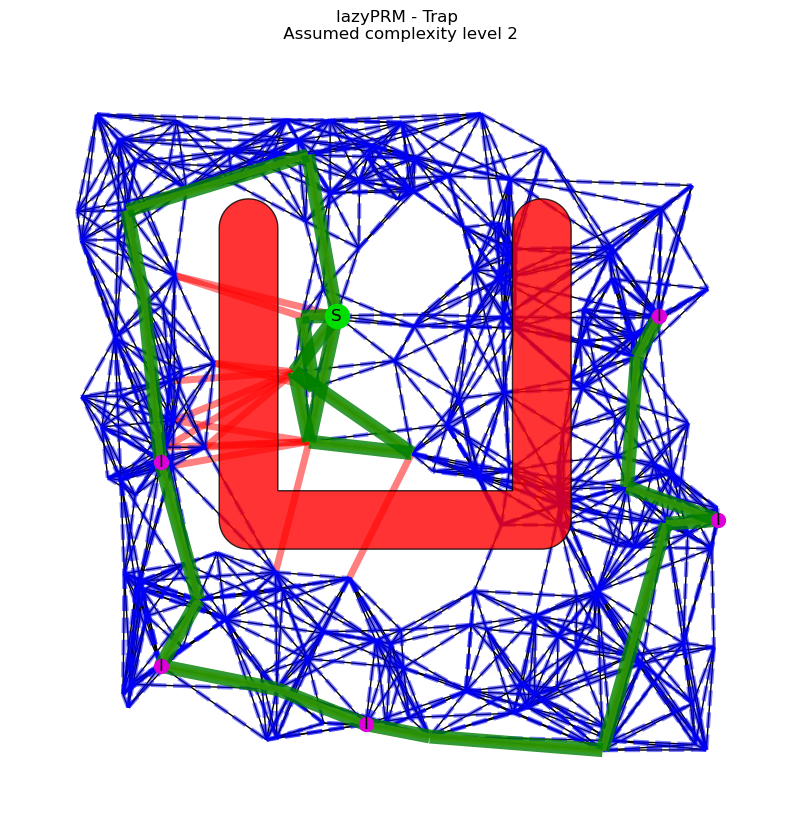

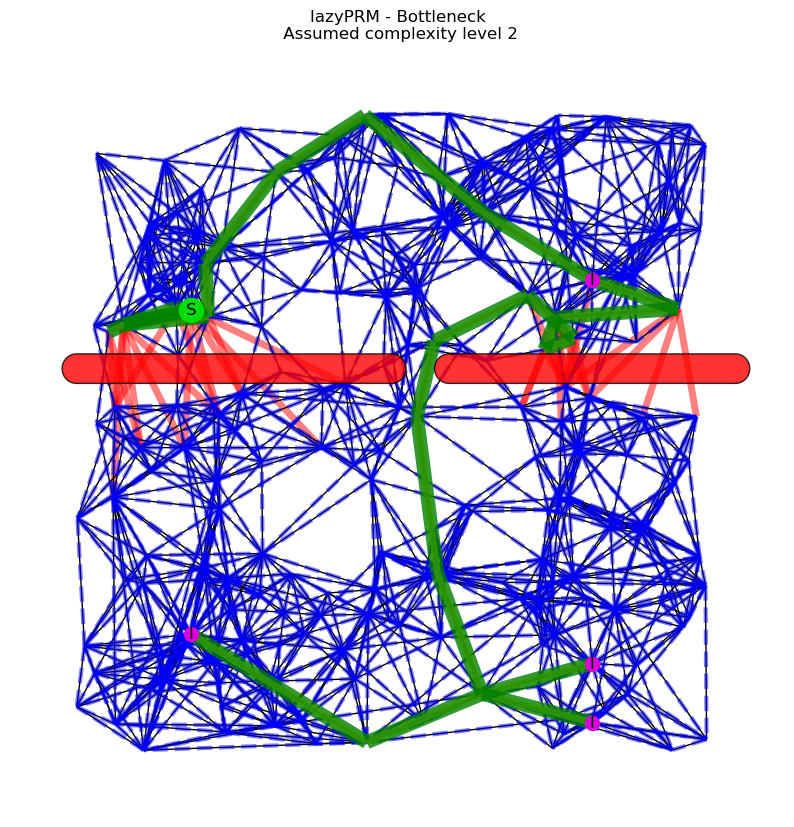

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    print(result)
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("")
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

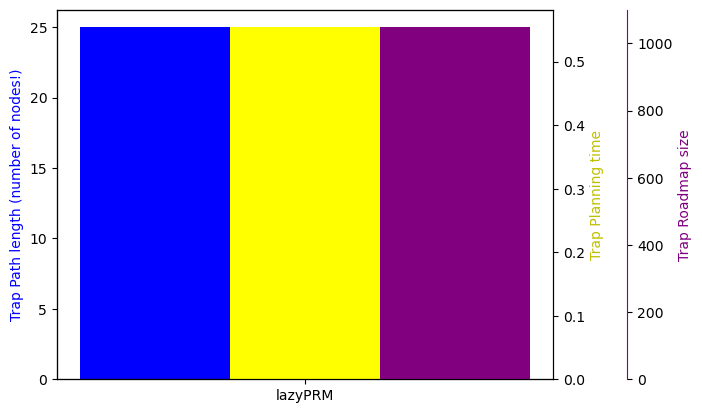

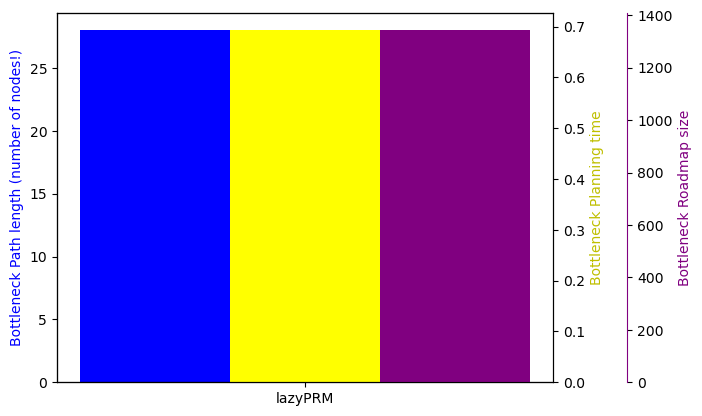

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_buildRoadmap,0.139498
_checkForCollisionAndUpdate,0.231561
_nearestInterim,0.026241
lineInCollision,0.190086
planRoundPath,0.692788
pointInCollision,0.185272


In [12]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

,name,args,kwargs,retVal,time
198,planRoundPath,(<IPLazyPRM_Roundtrip.LazyPRM object at 0x7f17...,{},"[start, 34, 20, start, 34, 51, 34, 60, 9, 18, ...",0.692788


In [13]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_58332/2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0